# Exploring the parameter space

In this notebook, you will use simple Python control statements (for-loop mainly) to easily loop over calculation parameters and plot the calculated spectra.

## Import the required packages, setup logging, and save the current working directory

In [1]:
%matplotlib notebook

import os
import sys
import logging

import numpy as np
import matplotlib.pyplot as plt

from crispy.notebook import Calculation


logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logging.getLogger("crispy").setLevel(logging.INFO)

swd = os.getcwd()

## Set up the calculation and loop over the crystal field parameter

In [2]:
calc = Calculation("Fe3+", "Oh", "XAS", "K (1s)")

<IPython.core.display.Javascript object>


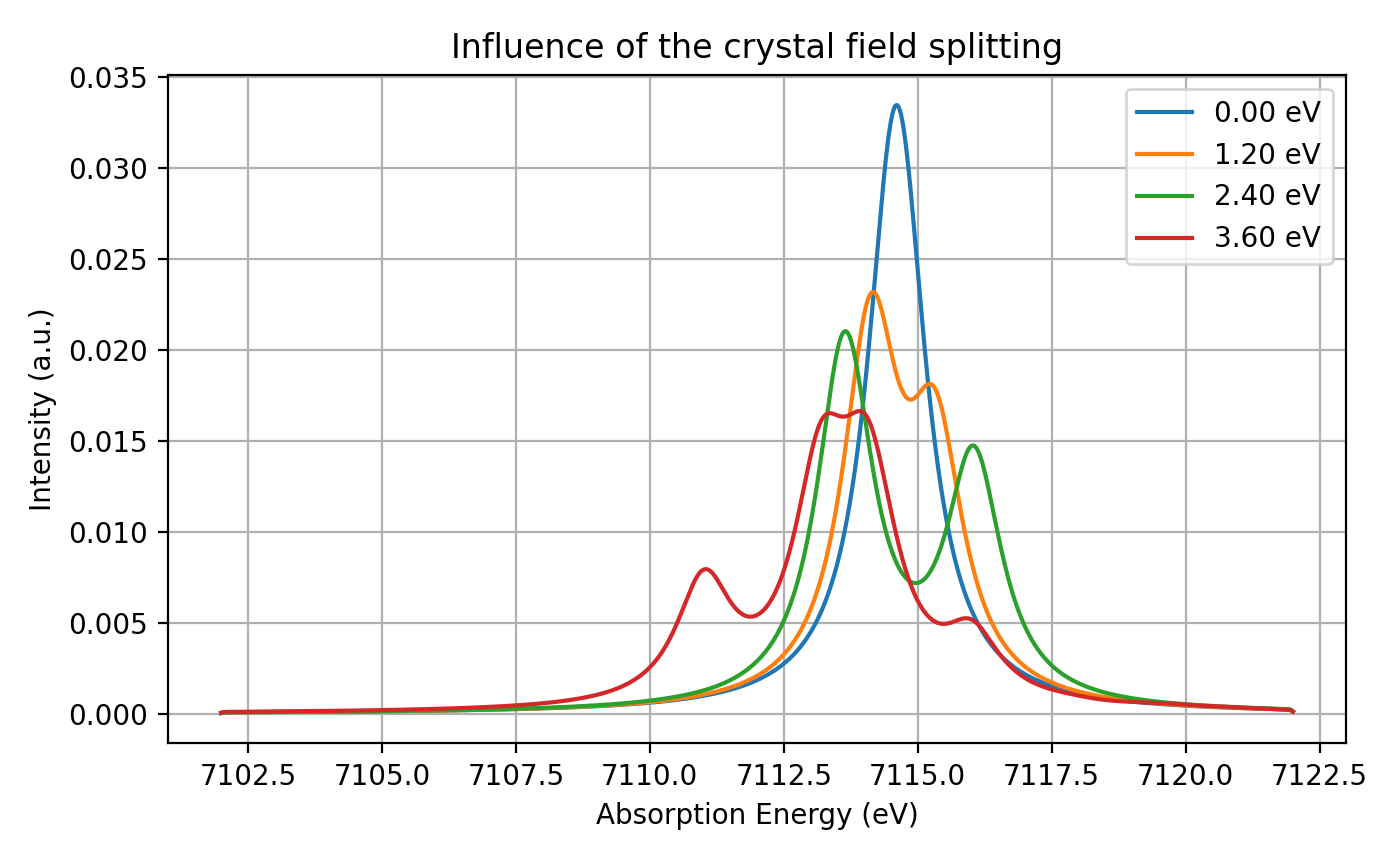

INFO:crispy.quanty.calculation:Running Quanty Fe3+_Oh_XAS_1s.lua in the folder /home/esrf/retegan.
INFO:crispy.quanty.calculation:Quanty has finished successfully in 0.22 seconds.
INFO:crispy.quanty.calculation:Running Quanty Fe3+_Oh_XAS_1s.lua in the folder /home/esrf/retegan.
INFO:crispy.quanty.calculation:Quanty has finished successfully in 0.42 seconds.
INFO:crispy.quanty.calculation:Running Quanty Fe3+_Oh_XAS_1s.lua in the folder /home/esrf/retegan.
INFO:crispy.quanty.calculation:Quanty has finished successfully in 0.42 seconds.
INFO:crispy.quanty.calculation:Running Quanty Fe3+_Oh_XAS_1s.lua in the folder /home/esrf/retegan.
INFO:crispy.quanty.calculation:Quanty has finished successfully in 0.22 seconds.


In [3]:
fig, ax = plt.subplots(figsize=(7, 4.3))


header = []
results = []

tendqs = np.linspace(0, 3.6, 4)

for tendq in tendqs:
    
    # Set the 10Dq value.
    calc.hamiltonian.set_parameter("10Dq(3d)", tendq)
    
    # Run the calculation.
    calc.run()
    
    # Extract the isotropic spectrum from the calculated data.
    data = calc.spectra.get_calculated_data()
    data = data["Isotropic Absorption"]
    x, signal = data["x"], data["signal"]
    
    # Plot the isotropic spectrum.
    ax.plot(x, signal, label = f"{tendq:.2f} eV")
    
    # Append the calculated isotropic spectrum to results.
    header.append(f"x and signal for 10Dq = {tendq}")
    results.extend([x, signal])

ax.legend()
ax.grid()
ax.set_xlabel("Absorption Energy (eV)")
ax.set_ylabel("Intensity (a.u.)")
ax.set_title("Influence of the crystal field splitting")
plt.tight_layout()    

## Save the calculate spectra to file

In [4]:
os.chdir(swd)
np.savetxt(fname="6_results.dat", X=np.array(results).T, header=", ".join(header))
!ls

0_xas.ipynb	  4_first_calculation.ipynb    assets
1_xes.ipynb	  5_varying_parameters.ipynb   experimental_data
2_xes_texs.ipynb  6_actinides_covalency.ipynb
3_rixs.ipynb	  6_results.dat
